In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.3 scipy==1.6.3 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
from descartes_rpa.convert.loom import loom_to_anndata
adata = loom_to_anndata("../../Thymus_processed.loom")

/home/joao/anaconda3/envs/descartes_rpa/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
adata.var

,exon_intron,gene_id,gene_short_name,gene_type,index,var_names
0,exon,ENSG00000223972.4,DDX11L1,pseudogene,1,ENSG00000223972.4
1,exon,ENSG00000227232.4,WASH7P,pseudogene,3,ENSG00000227232.4
2,exon,ENSG00000243485.2,MIR1302-11,lincRNA,5,ENSG00000243485.2
3,exon,ENSG00000237613.2,FAM138A,lincRNA,7,ENSG00000237613.2
4,exon,ENSG00000268020.2,OR4G4P,pseudogene,9,ENSG00000268020.2
...,...,...,...,...,...,...
63556,exon,ENSG00000240779.1,CU463998.1,miRNA,127113,ENSG00000240779.1
63557,exon,ENSG00000244656.1,CU463998.3,miRNA,127115,ENSG00000244656.1
63558,exon,ENSG00000263760.1,CU463998.4,miRNA,127117,ENSG00000263760.1
63559,exon,ENSG00000222670.2,CU459211.1,miRNA,127119,ENSG00000222670.2


## This function formats the AnnData from Descartes loom, turning the index in the gene_short_name, and also creating "adata.obsm['X_umap']", since this is the expected format for plotting

In [4]:
# Import function to format descartes into scanpy API data

from descartes_rpa.analyze.analyze import scanpy_format

In [5]:
adata.var

,exon_intron,gene_id,gene_short_name,gene_type,index,var_names
0,exon,ENSG00000223972.4,DDX11L1,pseudogene,1,ENSG00000223972.4
1,exon,ENSG00000227232.4,WASH7P,pseudogene,3,ENSG00000227232.4
2,exon,ENSG00000243485.2,MIR1302-11,lincRNA,5,ENSG00000243485.2
3,exon,ENSG00000237613.2,FAM138A,lincRNA,7,ENSG00000237613.2
4,exon,ENSG00000268020.2,OR4G4P,pseudogene,9,ENSG00000268020.2
...,...,...,...,...,...,...
63556,exon,ENSG00000240779.1,CU463998.1,miRNA,127113,ENSG00000240779.1
63557,exon,ENSG00000244656.1,CU463998.3,miRNA,127115,ENSG00000244656.1
63558,exon,ENSG00000263760.1,CU463998.4,miRNA,127117,ENSG00000263760.1
63559,exon,ENSG00000222670.2,CU459211.1,miRNA,127119,ENSG00000222670.2


In [6]:
scanpy_format(adata=adata)

/home/joao/anaconda3/envs/descartes_rpa/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-5', 'SNORD116-6']
  warnings.warn(


In [7]:
adata.var

,exon_intron,gene_id,gene_type,index,var_names
gene_short_name,,,,,
DDX11L1,exon,ENSG00000223972.4,pseudogene,1,ENSG00000223972.4
WASH7P,exon,ENSG00000227232.4,pseudogene,3,ENSG00000227232.4
MIR1302-11,exon,ENSG00000243485.2,lincRNA,5,ENSG00000243485.2
FAM138A,exon,ENSG00000237613.2,lincRNA,7,ENSG00000237613.2
OR4G4P,exon,ENSG00000268020.2,pseudogene,9,ENSG00000268020.2
...,...,...,...,...,...
CU463998.1,exon,ENSG00000240779.1,miRNA,127113,ENSG00000240779.1
CU463998.3,exon,ENSG00000244656.1,miRNA,127115,ENSG00000244656.1
CU463998.4,exon,ENSG00000263760.1,miRNA,127117,ENSG00000263760.1


... storing 'Assay' as categorical
... storing 'Experiment_batch' as categorical
... storing 'Fetus_id' as categorical
... storing 'Main_cluster_name' as categorical
... storing 'Organ' as categorical
... storing 'Organ_cell_lineage' as categorical
... storing 'RT_group' as categorical
... storing 'Sex' as categorical
... storing 'exon_intron' as categorical
... storing 'gene_type' as categorical


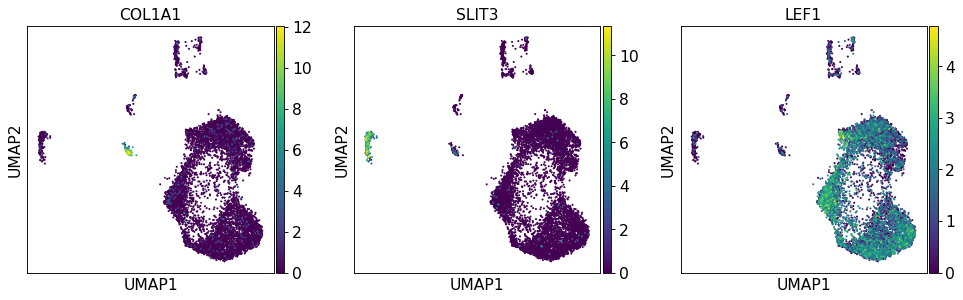

In [8]:
sc.pl.umap(adata, color=["COL1A1", "SLIT3", "LEF1"])

In [9]:
adata.obs

,All_reads,Assay,Batch,Development_day,Exon_reads,Experiment_batch,Fetus_id,Intron_reads,Main_cluster_name,Main_cluster_umap_1,Main_cluster_umap_2,Organ,Organ_cell_lineage,RT_group,Sex,Size_Factor,n_counts,obs_names,sample
0,688,Nuclei,7,115,128,exp4,H27423,467,Thymocytes,1.480319,1.717246,Thymus,Thymus-Thymocytes,Thymus_H27423,M,NaN,592.0,exp4-human-101well.ATGCTTCCTAACCATTGGA,exp4-human-101well.ATGCTTCCTAACCATTGGA
1,559,Nuclei,7,115,173,exp4,H27423,316,Thymocytes,1.836766,0.828598,Thymus,Thymus-Thymocytes,Thymus_H27423,M,NaN,487.0,exp4-human-103well.TTCCATTACTTTATTCATTC,exp4-human-103well.TTCCATTACTTTATTCATTC
2,312,Nuclei,7,115,222,exp4,H27423,39,Thymocytes,1.720090,1.417247,Thymus,Thymus-Thymocytes,Thymus_H27423,M,NaN,252.0,exp4-human-103well.GACCGTCATCATTCGACGG,exp4-human-103well.GACCGTCATCATTCGACGG
3,423,Nuclei,7,115,60,exp4,H27423,271,Thymocytes,1.329029,0.776162,Thymus,Thymus-Thymocytes,Thymus_H27423,M,NaN,330.0,exp4-human-104well.CCAGCCTTTTAACTGGTTA,exp4-human-104well.CCAGCCTTTTAACTGGTTA
4,341,Nuclei,7,115,140,exp4,H27423,165,Thymocytes,1.674138,1.022330,Thymus,Thymus-Thymocytes,Thymus_H27423,M,NaN,304.0,exp4-human-104well.CAAGCAACTTGGTCAGCCA,exp4-human-104well.CAAGCAACTTGGTCAGCCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8774,429,Nuclei,4,110,174,exp3,H27471,176,Thymocytes,1.884309,1.473001,Thymus,Thymus-Thymocytes,Thymus_H27471,F,NaN,349.0,exp3-human-403well.AGAGTACCTTAGATCTACT,exp3-human-403well.AGAGTACCTTAGATCTACT
8775,342,Nuclei,4,110,97,exp3,H27471,199,Thymocytes,1.933699,0.883870,Thymus,Thymus-Thymocytes,Thymus_H27471,F,NaN,293.0,exp3-human-410well.ACAACCTATTCATCTCTGCA,exp3-human-410well.ACAACCTATTCATCTCTGCA
8776,311,Nuclei,4,110,130,exp3,H27471,137,Antigen presenting cells,1.491640,2.114090,Thymus,Thymus-Antigen presenting cells,Thymus_H27471,F,NaN,266.0,exp3-human-423well.TTCTCATTGTACTTAACCTT,exp3-human-423well.TTCTCATTGTACTTAACCTT
8777,389,Nuclei,4,110,104,exp3,H27471,231,Thymocytes,1.471399,1.168557,Thymus,Thymus-Thymocytes,Thymus_H27471,F,NaN,332.0,exp3-human-476well.TCCAAGTTATATCCATGACT,exp3-human-476well.TCCAAGTTATATCCATGACT


In [10]:
from descartes_rpa.analyze.analyze import get_pathways_for_group

In [11]:
get_pathways_for_group(adata=adata, groupby="Main_cluster_name")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:27)


In [12]:
adata

AnnData object with n_obs × n_vars = 8779 × 63561
    obs: 'All_reads', 'Assay', 'Batch', 'Development_day', 'Exon_reads', 'Experiment_batch', 'Fetus_id', 'Intron_reads', 'Main_cluster_name', 'Main_cluster_umap_1', 'Main_cluster_umap_2', 'Organ', 'Organ_cell_lineage', 'RT_group', 'Sex', 'Size_Factor', 'n_counts', 'obs_names', 'sample'
    var: 'exon_intron', 'gene_id', 'gene_type', 'index', 'var_names'
    uns: 'rank_genes_groups', 'pathways'
    obsm: 'X_umap'

In [13]:
adata.uns["pathways"].keys()

odict_keys(['Thymocytes', 'Antigen presenting cells', 'Thymic epithelial cells', 'Stromal cells', 'Vascular endothelial cells'])

In [14]:
adata.uns["pathways"]["Thymocytes"]["pathway_data"]["pathways"][0:2]

[{'stId': 'R-HSA-8878159',
  'dbId': 8878159,
  'name': 'Transcriptional regulation by RUNX3',
  'species': {'dbId': 48887, 'taxId': '9606', 'name': 'Homo sapiens'},
  'llp': False,
  'entities': {'resource': 'TOTAL',
   'total': 118,
   'found': 5,
   'ratio': 0.008114427176454407,
   'pValue': 2.9588821486292716e-06,
   'fdr': 0.0005473931974964152,
   'exp': []},
  'reactions': {'resource': 'TOTAL',
   'total': 47,
   'found': 9,
   'ratio': 0.0034773601657295057},
  'inDisease': False},
 {'stId': 'R-HSA-8951911',
  'dbId': 8951911,
  'name': 'RUNX3 regulates RUNX1-mediated transcription',
  'species': {'dbId': 48887, 'taxId': '9606', 'name': 'Homo sapiens'},
  'llp': True,
  'entities': {'resource': 'TOTAL',
   'total': 4,
   'found': 2,
   'ratio': 0.00027506532801540364,
   'pValue': 2.8463826064362152e-05,
   'fdr': 0.002618671997921318,
   'exp': []},
  'reactions': {'resource': 'TOTAL',
   'total': 2,
   'found': 2,
   'ratio': 0.0001479727730097662},
  'inDisease': False}]

In [15]:
del adata.uns["pathways"]

In [16]:
sc.pp.neighbors(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:10)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)


In [17]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


In [18]:
get_pathways_for_group(adata=adata, groupby="leiden")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:31)


In [19]:
adata.uns["pathways"].keys()

odict_keys(['2', '7', '5', '10', '0', '9', '8', '6', '1', '3', '11', '4', '12', '15', '13', '14'])

In [20]:
adata.uns["pathways"]["9"]["pathway_data"]["pathways"][-2:]

[{'stId': 'R-HSA-162582',
  'dbId': 162582,
  'name': 'Signal Transduction',
  'species': {'dbId': 48887, 'taxId': '9606', 'name': 'Homo sapiens'},
  'llp': False,
  'entities': {'resource': 'TOTAL',
   'total': 2993,
   'found': 7,
   'ratio': 0.2058176316875258,
   'pValue': 0.999988530616609,
   'fdr': 0.999988530616609,
   'exp': []},
  'reactions': {'resource': 'TOTAL',
   'total': 2445,
   'found': 54,
   'ratio': 0.18089671500443918},
  'inDisease': False},
 {'stId': 'R-HSA-1430728',
  'dbId': 1430728,
  'name': 'Metabolism',
  'species': {'dbId': 48887, 'taxId': '9606', 'name': 'Homo sapiens'},
  'llp': False,
  'entities': {'resource': 'TOTAL',
   'total': 3633,
   'found': 3,
   'ratio': 0.24982808416999036,
   'pValue': 0.999999999977692,
   'fdr': 0.999999999977692,
   'exp': []},
  'reactions': {'resource': 'TOTAL',
   'total': 2250,
   'found': 6,
   'ratio': 0.166469369635987},
  'inDisease': False}]

In [21]:
from descartes_rpa.analyze.analyze import enrich_de_cell_types

In [22]:
enrich_de_cell_types(adata=adata)

In [23]:
adata.uns["pathways_de"].keys()

odict_keys(['Parietal and chief cells', 'SATB2_LRRC7 positive cells', 'Acinar cells', 'PAEP_MECOM positive cells', 'SLC24A4_PEX5L positive cells', 'Horizontal cells', 'Megakaryocytes', 'Microglia', 'Antigen presenting cells', 'IGFBP1_DKK1 positive cells', 'Granule neurons', 'AFP_ALB positive cells', 'Sympathoblasts', 'Bronchiolar and alveolar epithelial cells', 'Unipolar brush cells', 'Ureteric bud cells', 'Limbic system neurons', 'Ductal cells', 'Corneal and conjunctival epithelial cells', 'MUC13_DMBT1 positive cells', 'Bipolar cells', 'Astrocytes', 'PDE11A_FAM19A2 positive cells', 'SLC26A4_PAEP positive cells', 'CLC_IL5RA positive cells', 'Vascular endothelial cells', 'Mesangial cells', 'ENS neurons', 'Purkinje neurons', 'STC2_TLX1 positive cells', 'Extravillous trophoblasts', 'Squamous epithelial cells', 'Trophoblast giant cells', 'Retinal progenitors and Muller glia', 'Thymic epithelial cells', 'Goblet cells', 'PDE1C_ACSM3 positive cells', 'Hematopoietic stem cells', 'Ciliated epit

In [25]:
adata.uns["pathways_de"]["Microglia"]["pathway_data"]["pathways"][:3]

[{'stId': 'R-HSA-6783783',
  'dbId': 6783783,
  'name': 'Interleukin-10 signaling',
  'species': {'dbId': 48887, 'taxId': '9606', 'name': 'Homo sapiens'},
  'llp': True,
  'entities': {'resource': 'TOTAL',
   'total': 86,
   'found': 14,
   'ratio': 0.005913904552331178,
   'pValue': 0.0005459791372735001,
   'fdr': 0.6104046754717731,
   'exp': []},
  'reactions': {'resource': 'TOTAL',
   'total': 15,
   'found': 2,
   'ratio': 0.0011097957975732466},
  'inDisease': False},
 {'stId': 'R-HSA-1299287',
  'dbId': 1299287,
  'name': 'Tandem pore domain halothane-inhibited K+ channel (THIK)',
  'species': {'dbId': 48887, 'taxId': '9606', 'name': 'Homo sapiens'},
  'llp': True,
  'entities': {'resource': 'TOTAL',
   'total': 2,
   'found': 1,
   'ratio': 0.00013753266400770182,
   'pValue': 0.10763931916969116,
   'fdr': 0.7891201302956607,
   'exp': []},
  'reactions': {'resource': 'TOTAL',
   'total': 1,
   'found': 1,
   'ratio': 7.39863865048831e-05},
  'inDisease': False},
 {'stId': 'R

In [26]:
len(adata.uns["pathways_de"]["Microglia"]["pathway_data"]["pathways"])

877